In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/studentpor/student-por.csv
/kaggle/input/studentmat/student-mat.csv
/kaggle/input/student-performance-data-set/student-por.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [3]:
stu_por=pd.read_csv("../input/studentpor/student-por.csv",sep=";")
stu_mat=pd.read_csv("../input/studentmat/student-mat.csv",sep=";")


In [4]:
stu_por.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


Merging two datasets

In [5]:
stu=pd.concat([stu_por,stu_mat])
stu["total_grades"]=(stu["G1"]+stu["G2"]+stu["G3"])/3

Dropping columns

In [6]:
stu=stu.drop(["G1","G2","G3"],axis=1)
max=stu["total_grades"].max()
min=stu["total_grades"].min()

In [7]:
#ranging the grade in three parts
def marks(total_grades):
    if(total_grades<7):
        return("low")
    elif(total_grades>=7 and total_grades<14):
        return("average")
    elif(total_grades>=14):
        return("high")
stu["grades"]=stu["total_grades"].apply(marks)

ANALYZING THE DATA

In [8]:
stu.dtypes
stu.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


In [9]:
#describing categorical data
stu.describe(include="all")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241,NaN
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333,NaN


In [10]:
stu.info()

#checking for null values
stu.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1044 non-null   object 
 1   sex           1044 non-null   object 
 2   age           1044 non-null   int64  
 3   address       1044 non-null   object 
 4   famsize       1044 non-null   object 
 5   Pstatus       1044 non-null   object 
 6   Medu          1044 non-null   int64  
 7   Fedu          1044 non-null   int64  
 8   Mjob          1044 non-null   object 
 9   Fjob          1044 non-null   object 
 10  reason        1044 non-null   object 
 11  guardian      1044 non-null   object 
 12  traveltime    1044 non-null   int64  
 13  studytime     1044 non-null   int64  
 14  failures      1044 non-null   int64  
 15  schoolsup     1044 non-null   object 
 16  famsup        1044 non-null   object 
 17  paid          1044 non-null   object 
 18  activities    1044 non-null  

school          False
sex             False
age             False
address         False
famsize         False
Pstatus         False
Medu            False
Fedu            False
Mjob            False
Fjob            False
reason          False
guardian        False
traveltime      False
studytime       False
failures        False
schoolsup       False
famsup          False
paid            False
activities      False
nursery         False
higher          False
internet        False
romantic        False
famrel          False
freetime        False
goout           False
Dalc            False
Walc            False
health          False
absences        False
total_grades    False
grades          False
dtype: bool

Text(0, 0.5, 'Number of Student')

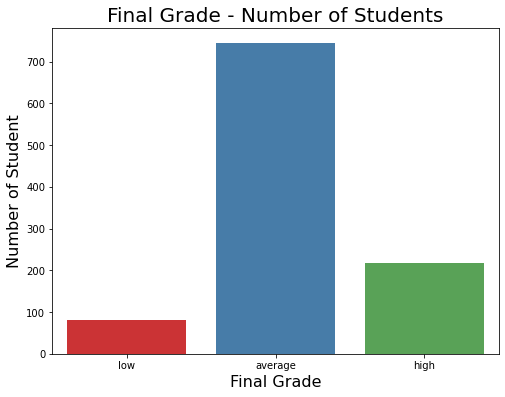

In [11]:
#visualizing the grades
plt.figure(figsize=(8,6))
sns.countplot(stu["grades"], order=["low","average","high"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

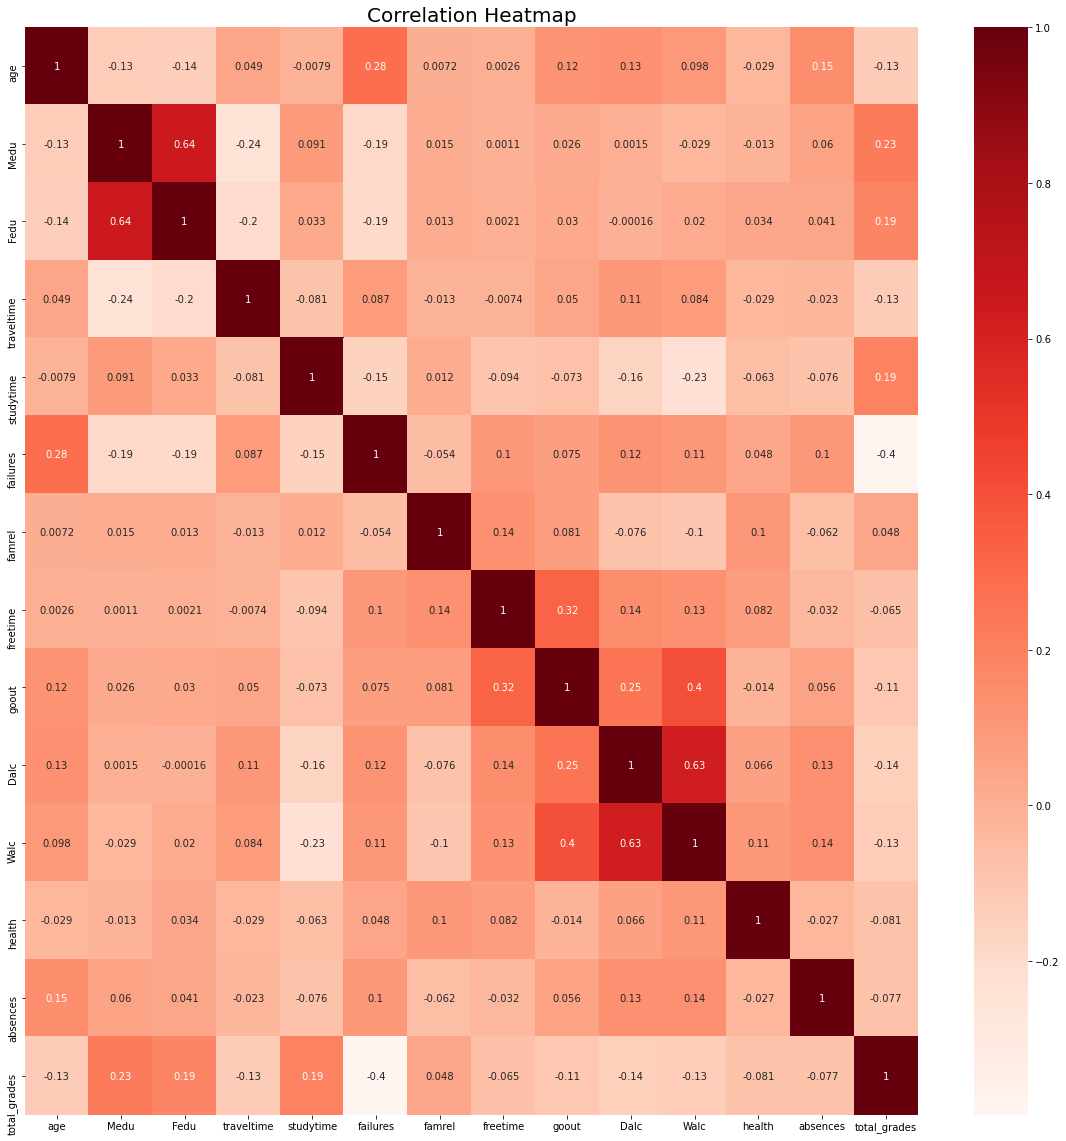

In [12]:
#describing correlation
corr=stu.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

ANALYZING CATEGORICAL VARIABLES

using boxplots

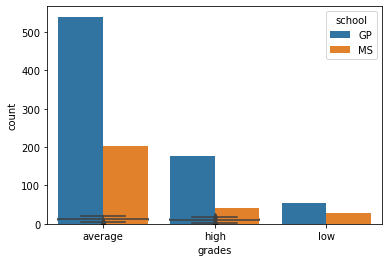

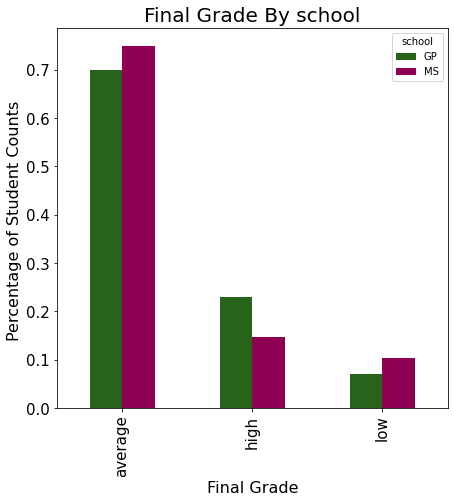

In [13]:
#comparing school with grades
sns.boxplot(x="school", y="total_grades", data=stu)

school_counts=stu["school"].value_counts().to_frame()
school_counts.rename(columns={"school":"school_counts"},inplace=True)
school_counts.index.name='school'

school_sns=sns.countplot(hue=stu["school"],x=stu["grades"],data=stu)

#crosstab is expanded form of value counts the the factors inside any variables
perc=(lambda col:col/col.sum())
index=["average","high","low"]
schooltab1=pd.crosstab(columns=stu.school,index=stu.grades)

school_perc=schooltab1.apply(perc).reindex(index)

school_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By school', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#so by graph we know that school has impact on grades of students

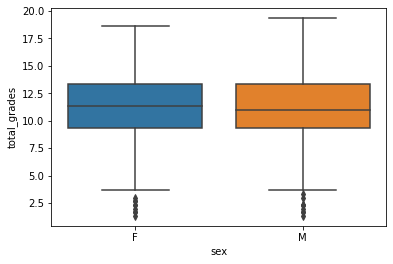

In [14]:
#comparing sex with grades
sns.boxplot(x="sex", y="total_grades", data=stu)
school_counts=stu["sex"].value_counts()
#as the graph of sex nearly overlaps so it will not have impact on grades
stu=stu.drop(["sex"],axis=1)



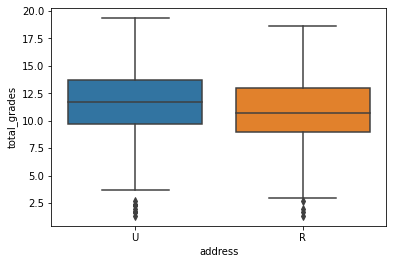

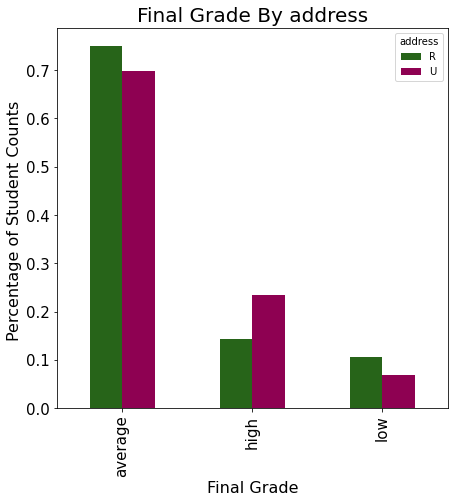

In [15]:
#comparing address with grades
sns.boxplot(x="address", y="total_grades", data=stu)
index=["average","high","low"]
addresstab1=pd.crosstab(columns=stu.address,index=stu.grades)

address_perc=addresstab1.apply(perc).reindex(index)

address_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By address', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#address is factor for the grades

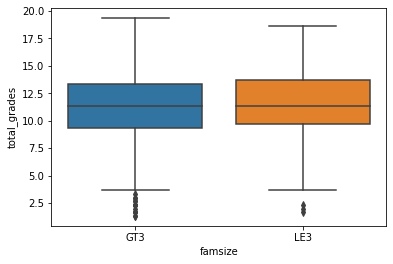

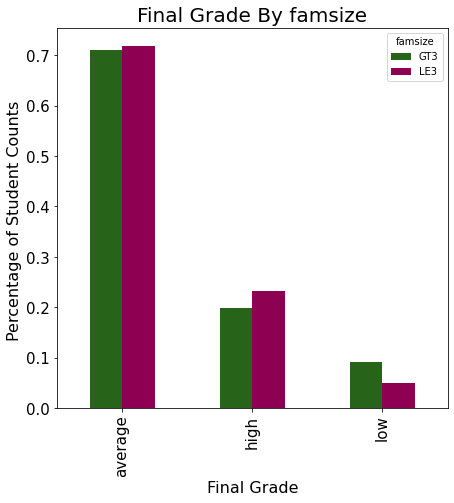

In [16]:
#comparing famsize with grades
sns.boxplot(x="famsize", y="total_grades", data=stu)
famsizetab1=pd.crosstab(columns=stu.famsize,index=stu.grades)

famsize_perc=famsizetab1.apply(perc).reindex(index)

famsize_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By famsize', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#famsize has great impact on grades

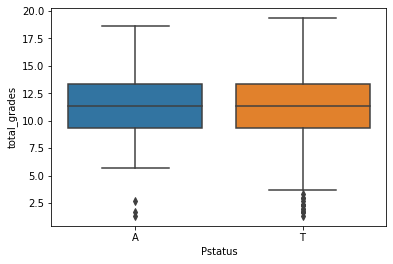

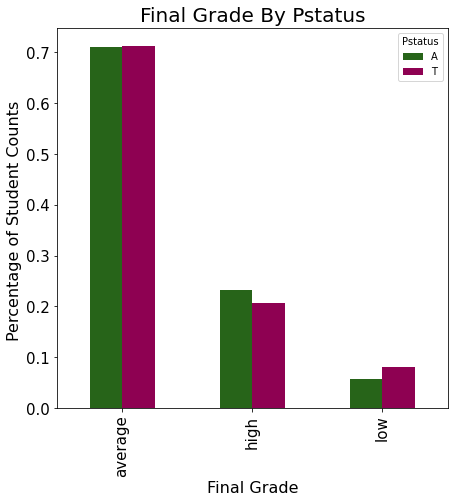

In [17]:
#comparing pstatus with grades
sns.boxplot(x="Pstatus", y="total_grades", data=stu)
Pstatustab1=pd.crosstab(columns=stu.Pstatus,index=stu.grades)

Pstatus_perc=Pstatustab1.apply(perc).reindex(index)

Pstatus_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By Pstatus', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#it is not a good factor

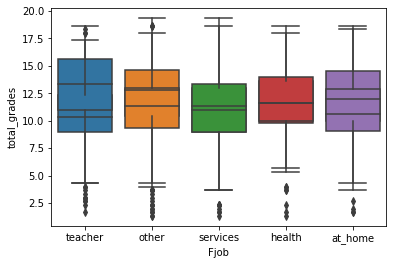

In [18]:
#comparing jobs
sns.boxplot(x="Mjob", y="total_grades", data=stu)
sns.boxplot(x="Fjob", y="total_grades", data=stu)
stu1=stu[["Fjob","Mjob","total_grades"]]
job_grp=stu1.groupby(['Mjob','Fjob'],as_index=False).mean()
job_pivot=job_grp.pivot(index='Mjob',columns='Fjob',values='total_grades')

#so father and mother jobs has great impact on grades

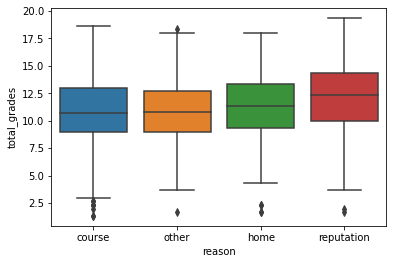

In [19]:
#comparing reasons
sns.boxplot(x="reason", y="total_grades", data=stu)
#it has impact on the grades

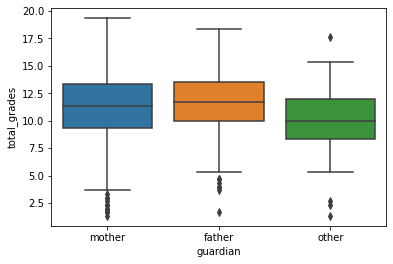

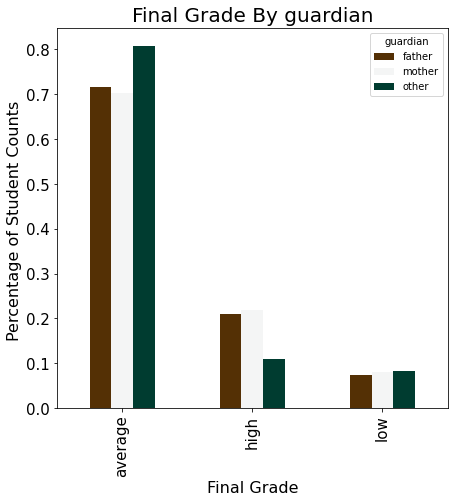

In [20]:
#comparing guardians
sns.boxplot(x="guardian", y="total_grades", data=stu)

guardiantab1=pd.crosstab(columns=stu.guardian,index=stu.grades)
guardian_perc=guardiantab1.apply(perc).reindex(index)
guardian_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By guardian', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#so guardian has grat impact on grades

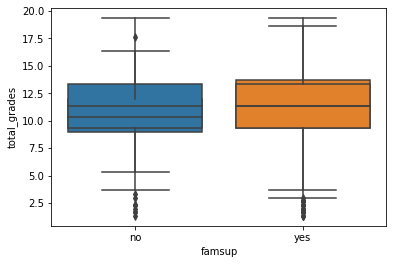

In [21]:
#support of family and school
sns.boxplot(x="schoolsup", y="total_grades", data=stu)
#it is the important factor
sns.boxplot(x="famsup", y="total_grades", data=stu)
stu[["famsup","total_grades"]].groupby(["famsup"],as_index=False).mean()
#famsup does not have great impact on grades 
stu=stu.drop(["famsup"],axis=1) 

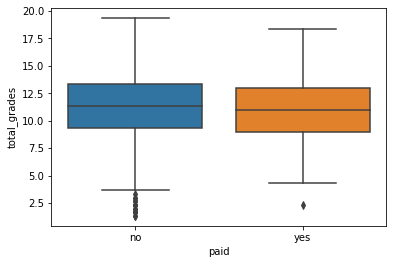

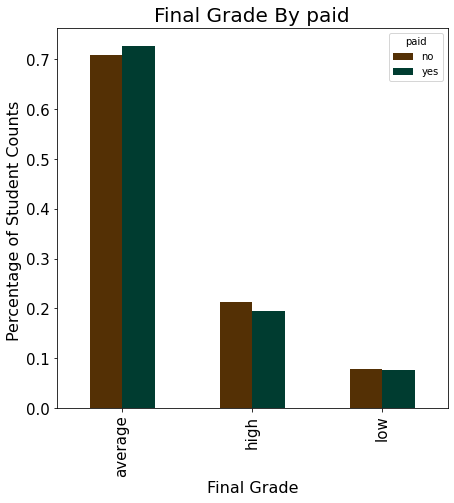

In [22]:
#comparing paid attributes
sns.boxplot(x="paid", y="total_grades", data=stu)
paidtab1=pd.crosstab(columns=stu.paid,index=stu.grades)
paid_perc=paidtab1.apply(perc).reindex(index)
paid_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By paid', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#paid does not have much influence on grades so
stu=stu.drop(["paid"],axis=1)




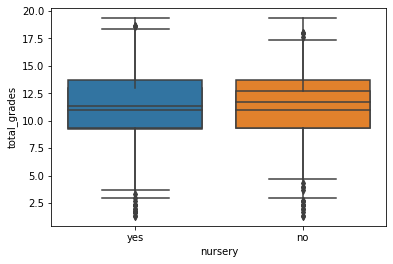

In [23]:
sns.boxplot(x="activities", y="total_grades", data=stu)
#is has graet impact on student perforamnce
sns.boxplot(x="nursery", y="total_grades", data=stu)
#it does not have great impact on performance
stu=stu.drop(["nursery"],axis=1)

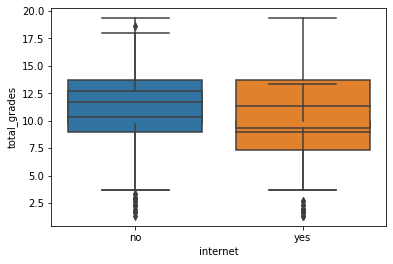

In [24]:
#comparing if higher educatiob of students have impact on performance
sns.boxplot(x="higher", y="total_grades", data=stu)

sns.boxplot(x="internet", y="total_grades", data=stu)
#internet also have great impact on performance of individual


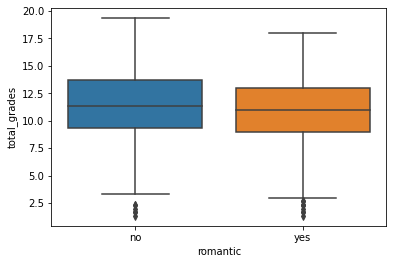

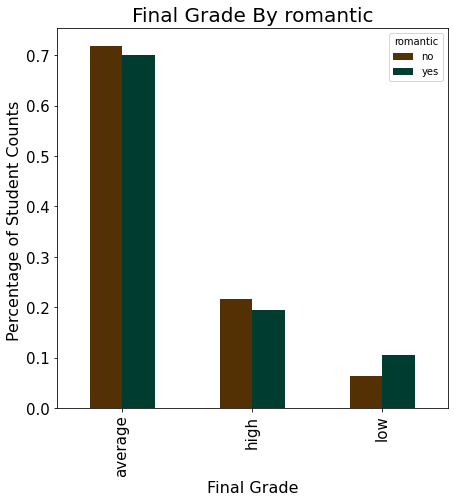

In [25]:
#high school romace impact on the performance of students
sns.boxplot(x="romantic", y="total_grades", data=stu)
romantictab1=pd.crosstab(columns=stu.romantic,index=stu.grades)
romantic_perc=romantictab1.apply(perc).reindex(index)
romantic_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By romantic', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#so high school romance leads to decline in performance of students
#beware of that

#encoding categorical data

In [26]:
stu.columns

Index(['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'total_grades', 'grades'],
      dtype='object')

In [27]:
stu1=pd.get_dummies(stu,columns=["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup', 'activities', 'higher', 'internet', 'romantic' ])
test_stu1=stu1["grades"]
teststu1=stu1["total_grades"]
train_stu1=stu1.drop(['total_grades','grades'],axis=1)
train_stu=train_stu1.values

In [28]:
train_stu1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,1,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,1,0,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [29]:
teststu1

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: total_grades, Length: 1044, dtype: float64

ANALYZING NUMERICAL VARIABLES

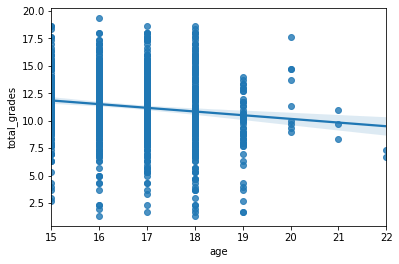

In [30]:
from scipy import stats
#comparing age with marks
sns.regplot(x="age",y="total_grades",data=stu)



In [31]:
#pearson coeffiecient
stu[["age","total_grades"]].corr()
#p-value
pearson_coef , p_value=stats.pearsonr(stu["age"],stu["total_grades"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#age is not a good factor

The Pearson Correlation Coefficient is -0.1291345227038881  with a P-value of P = 2.8516659922093794e-05


In [32]:
#using backward elimination for finding optimal featrures

#if p-value is greater than 0.6 than we will removethat feature
import statsmodels.api as sm
X=np.append(arr=np.ones((1044,1)).astype(int),values=train_stu,axis=1)
X_opt = X[:, [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_grades   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     25.74
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.53e-47
Time:                        10:14:42   Log-Likelihood:                -2574.8
No. Observations:                1044   AIC:                             5174.
Df Residuals:                    1032   BIC:                             5233.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9881      0.646     17.005      0.000       9.720      12.256
x1             0.3571      0.105      3.394      0.001       0.151       0.564
x2             0.1062      0.106      0.998      0.318      -0.103       0.315
x3            -0.1982      0.126     -1.570      0.117      -0.446       0.050
x4             0.4150      0.111      3.743      0.000       0.197       0.632
x5            -1.6060      0.142    -11.344      0.000      -1.884      -1.328
x6             0.1104      0.097      1.133      0.258      -0.081       0.302
x7            -0.1906      0.085     -2.235      0.026      -0.358      -0.023
x8            -0.2267      0.126     -1.798      0.072      -0.474       0.021
x9             0.0377      0.096      0.391      0.696      -0.152       0.227
x10           -0.1392      0.064     -2.190      0.029      -0.264      -0.014
x11           -0.0185      0.015     -1.269      0.205      -0.047       0.010
==============================================================================
Omnibus:                       40.630   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.582
Skew:                          -0.426   Prob(JB):                     2.82e-11
Kurtosis:                       3.625   Cond. No.                         73.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
stu.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


In [34]:
stu.columns


Index(['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'total_grades', 'grades'],
      dtype='object')

In [35]:
#now we merge our training data
train_x=np.concatenate((X_opt,X[:,14:49]),axis=1)
stu[["Medu","total_grades"]].corr()
stu[["Fedu","total_grades"]].corr()

,Fedu,total_grades
Fedu,1.00000,0.18661
total_grades,0.18661,1.00000


In [36]:
train_stu2=train_stu1.drop(["age","freetime"],axis=1)
np1=[1 for i in range(0,1044)]
train_stu2.insert(loc=0,column= "noimprotance", value=np1)
#now after getting the proper features we will split the data


In [37]:
train_stu2.columns
train_stu2.head(30)

,noimprotance,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,4,4,2,2,0,4,4,1,1,...,0,1,1,0,0,1,1,0,1,0
1,1,1,1,1,2,0,5,3,1,1,...,1,0,1,0,0,1,0,1,1,0
2,1,1,1,1,2,0,4,2,2,3,...,0,1,1,0,0,1,0,1,1,0
3,1,4,2,1,3,0,3,2,1,1,...,1,0,0,1,0,1,0,1,0,1
4,1,3,3,1,2,0,4,2,1,2,...,1,0,1,0,0,1,1,0,1,0
5,1,4,3,1,2,0,5,2,1,2,...,1,0,0,1,0,1,0,1,1,0
6,1,2,2,1,2,0,4,4,1,1,...,1,0,1,0,0,1,0,1,1,0
7,1,4,4,2,2,0,4,4,1,1,...,0,1,1,0,0,1,1,0,1,0
8,1,3,2,1,2,0,4,2,1,1,...,1,0,1,0,0,1,0,1,1,0
9,1,3,4,1,2,0,5,1,1,1,...,1,0,0,1,0,1,0,1,1,0


Splitting the dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x,test_stu1, test_size = 0.2, random_state = 0)


TRAINING THE DATASET

noimportant:0.0
Medu:0.04508384830145887
Fedu:0.04198321527627798
traveltime:0.02549913074222801
studytime:0.04015300365823519
failures:0.05194619500757226
famrel:0.04043733500660745
goout:0.047631167185876844
Dalc:0.02908865737052984
Walc:0.04566975953115625
health:0.048159752936765304
absences:0.1146464526231978
total_grades:0.011813152430145937
grades:0.01350571185541916
school_GP:0.014268435804511639
school_MS:0.01362002208597187
address_R:0.015029490452260302
address_U:0.014599354615624902
famsize_GT3:0.009514313350730871
famsize_LE3:0.008896633140747066
Pstatus_A:0.012810079789505957
Pstatus_T:0.010612294904854479
Mjob_at_home:0.017096026039735177
Mjob_health:0.017072342414054753
Mjob_other:0.011601667365553143
Mjob_services:0.009303739190318785
Mjob_teacher:0.004386468134692437
Fjob_at_home:0.01923724048260807
Fjob_health:0.016375926372939074
Fjob_other:0.011216695334541255
Fjob_services:0.01936630007799494
Fjob_teacher:0.01571261505729053
reason_course:0.00884480148215014
reaso

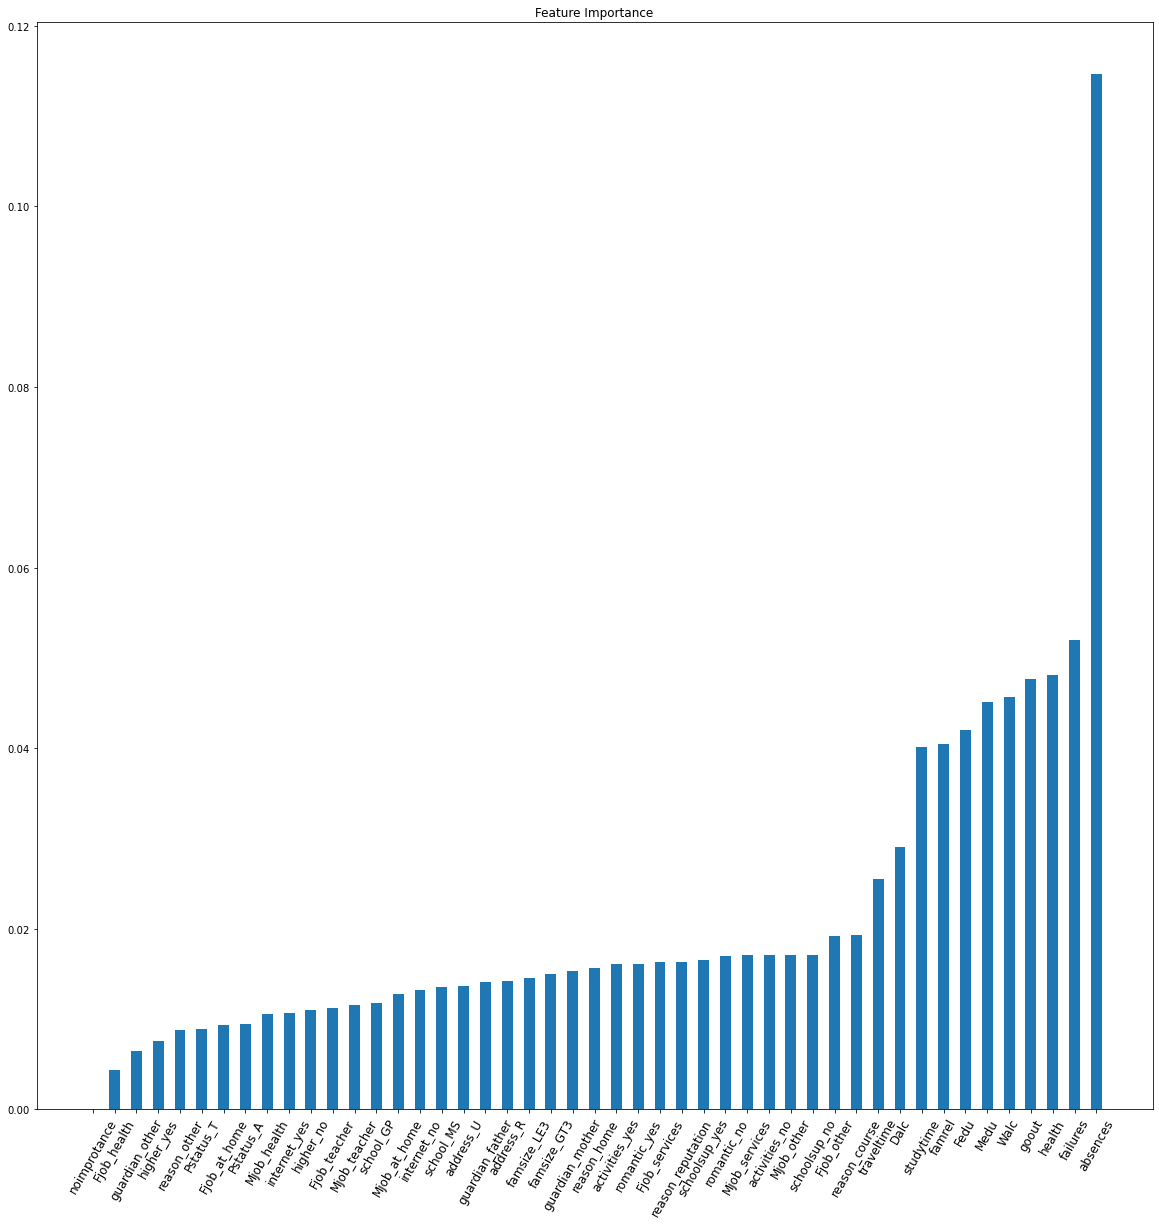

In [39]:
# =============================================================================
# #random forest
# =============================================================================
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

#predicting the test set re4sults
y_pred_random=classifier.predict(X_test)

importances=classifier.feature_importances_
for i,features in zip(importances,[ 'noimportant','Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'goout', 'Dalc', 'Walc', 'health', 'absences',
       'total_grades', 'grades', 'school_GP', 'school_MS', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']):
    print("{}:{}".format(features,i))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [train_stu2.columns[i] for i in indices]

# Barplot: Add bars

plt.figure(figsize=(20,20))
plt.bar(range(train_x.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
plt.xticks(range(train_x.shape[1]),names, rotation=60, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

#determinnig the confusion matrix
from sklearn.metrics import confusion_matrix
cm_random=confusion_matrix(y_test,y_pred_random)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_random=classification_report(y_test,y_pred_random)


In [40]:
# =============================================================================
# # Fitting Kernel SVM to the Training set
# =============================================================================
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_SVC= classifier.predict(X_test)
cm_SVC=confusion_matrix(y_test,y_pred_SVC)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_SVC=classification_report(y_test,y_pred_SVC)
print(report_SVC)

              precision    recall  f1-score   support

     average       0.73      1.00      0.85       153
        high       0.00      0.00      0.00        38
         low       0.00      0.00      0.00        18

    accuracy                           0.73       209
   macro avg       0.24      0.33      0.28       209
weighted avg       0.54      0.73      0.62       209



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# =============================================================================
# #fitting logistic regression to the training set
# =============================================================================
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_logistic= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logistic= confusion_matrix(y_test, y_pred_logistic)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_logistic=classification_report(y_test,y_pred_logistic)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# =============================================================================
# #fitting the knn_calssifier to the training set
# =============================================================================
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_knn= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_knn=classification_report(y_test,y_pred_knn)



In [43]:
print(report_random)
print(report_SVC)
print(report_logistic)
print(report_knn)

              precision    recall  f1-score   support

     average       0.79      0.93      0.85       153
        high       0.67      0.42      0.52        38
         low       0.40      0.11      0.17        18

    accuracy                           0.77       209
   macro avg       0.62      0.49      0.51       209
weighted avg       0.73      0.77      0.73       209

              precision    recall  f1-score   support

     average       0.73      1.00      0.85       153
        high       0.00      0.00      0.00        38
         low       0.00      0.00      0.00        18

    accuracy                           0.73       209
   macro avg       0.24      0.33      0.28       209
weighted avg       0.54      0.73      0.62       209

              precision    recall  f1-score   support

     average       0.77      0.95      0.85       153
        high       0.69      0.29      0.41        38
         low       0.40      0.11      0.17        18

    accuracy        

SO BY CONFUSION MATRIX AND F-SCORE WE FIND OUT THAT RANDOM FOREST IS BEST CLASSIFIER FOR GIVEN PROBLEM.